# Creates the bipartite graph for the page-editor csv

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from pathlib import Path
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

Creates the bi-partite graph for page and editors

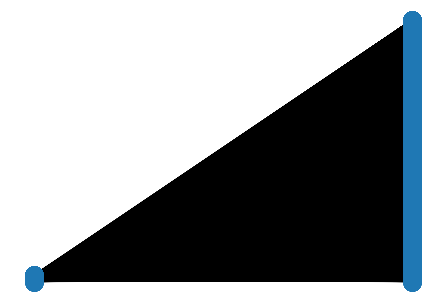

In [2]:
path = './../DATA'

page_id_nodes = pd.read_csv('{}/Graph/unique_page_node.csv'.format(path),
                            index_col=None,
                            header=0)
editor_nodes = pd.read_csv('{}/Graph/unique_editors_node.csv'.format(path), 
                           index_col=None, 
                           header=0)
edge_list = pd.read_csv('{}/Graph/page_editor_edgelist.csv'.format(path), 
                        index_col=None, 
                        header=0)

B = nx.Graph()
page_ids = page_id_nodes['page_id'].tolist()
editors = editor_nodes['user'].tolist()

B.add_nodes_from(page_ids, bipartite=0)
B.add_nodes_from(editors, bipartite=1)
B.add_edges_from(edge_list[['source', 'target']].to_records(index=False))

l,r = nx.bipartite.sets(B)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nx.draw(B, pos=pos)
plt.show()


Creates the gml file for the graph

In [3]:
Path(path + '/GML').mkdir(parents=True, exist_ok=True)

nx.write_gml(B, path + "/GML/editor_page_bipartite_graph.gml")